<h1> Lecture 7: Poisson Distribution </h1>

In [13]:
import random
import numpy as np
from math import ceil

#--------------------------------------------------------------------------------------------------------------
# This method generate pseudo-random numbeers between 0 and 1 with uniform distribution initialized by a seed 
#--------------------------------------------------------------------------------------------------------------


def rand_uniform(N, seed = 0.):

    if seed != 0. : random.seed(float(seed))
    randlist = []
    for i in range (0,N):
        
        randlist.append(random.random())
    return randlist

#-------------------------------------------------------------------------------------------------------------------
# This method generate pseudo-random numbers that follow an exponential pdf using the inverse function algorithm
#-------------------------------------------------------------------------------------------------------------------

def generate_exp(tau,N,seed):
    
    if tau <= 0 : raise ValueError('Tau must be a positive number')
    f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
    y = rand_uniform(N,seed)
    return list(map(f,y)) 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



<h3> Exercise 7.1 </h3>
<p> Generate a sample of pseudo-random numbers distributed according to an exponential density distribution with a characteristic time t0 of 5 seconds.
<uL>
<li>Visualize the distribution of the obtained sample in a histogram using the inverse function method.</li>
<li>Write all functions responsible for random number generation in a library, implemented in separate files from the main program.</li>
</ul>

(array([1149., 1033.,  881.,  844.,  741.,  664.,  585.,  474.,  439.,
         385.,  337.,  299.,  259.,  222.,  217.,  186.,  146.,  140.,
         114.,  103.,  108.,   82.,   63.,   72.,   63.,   45.,   45.,
          38.,   32.,   23.,   19.,   23.]),
 array([ 0.   ,  0.625,  1.25 ,  1.875,  2.5  ,  3.125,  3.75 ,  4.375,
         5.   ,  5.625,  6.25 ,  6.875,  7.5  ,  8.125,  8.75 ,  9.375,
        10.   , 10.625, 11.25 , 11.875, 12.5  , 13.125, 13.75 , 14.375,
        15.   , 15.625, 16.25 , 16.875, 17.5  , 18.125, 18.75 , 19.375,
        20.   ]),
 <BarContainer object of 32 artists>)

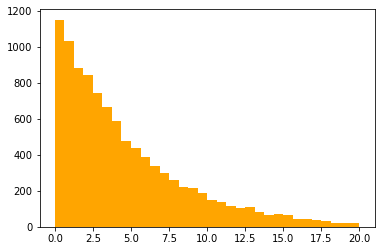

In [23]:
import matplotlib.pyplot as plt

tau = 5

randlist = generate_exp(tau,10000,10)

nBins = sturges(randlist)

bin_edges = np.linspace(0.,4*tau,nBins + 1)

plt.hist(randlist,bins = bin_edges, color = 'orange')

